In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Loading data

Loaded:  4898


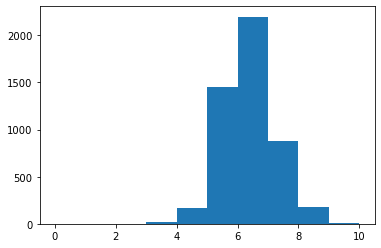

In [2]:
data = pd.read_csv('winequality-white.csv',sep=';')
print("Loaded: ",len(data))

samples = data.values[:,0:10]
labels = data.values[:,11]


plt.hist(labels,bins=10,range=(0,10))
plt.show()

# The simplest classification

In [3]:
model = KNeighborsClassifier()
model.fit(samples, labels)    

import random
for n in range(10):
    i = random.randrange(len(labels))
    predicted = model.predict(samples[i].reshape(1,-1))
    print(n," predicted",predicted[0], "real",labels[i], end=' ')
    if(predicted[0]==labels[i]):
        print("correct")
    else:
        print("wrong")

0  predicted 4.0 real 5.0 wrong
1  predicted 6.0 real 5.0 wrong
2  predicted 5.0 real 7.0 wrong
3  predicted 6.0 real 5.0 wrong
4  predicted 7.0 real 7.0 correct
5  predicted 5.0 real 6.0 wrong
6  predicted 6.0 real 6.0 correct
7  predicted 6.0 real 6.0 correct
8  predicted 6.0 real 6.0 correct
9  predicted 6.0 real 5.0 wrong


# Train-test split

In [4]:
# train-test split
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples, labels, stratify=labels,random_state=1)
model.fit(trainSamples, trainLabels)    

correct = 0;
predictedLabels = model.predict(testSamples)
for i in range(len(testSamples)):
    #print("real:",testLabels[i],"predicted:",predictedLabels[i])
    if(testLabels[i]==predictedLabels[i]):
        correct = correct + 1
print("Correct:",correct," of ",len(testSamples)," accuracy=",correct/len(testSamples))

Correct: 571  of  1225  accuracy= 0.4661224489795918


# Measures calculation

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,cohen_kappa_score
modelResults = model.predict(testSamples)
print(confusion_matrix(testLabels, modelResults))
print(classification_report(testLabels, modelResults))
accuracy = accuracy_score(testLabels, modelResults) 
print("Accuracy: {:.2f}".format(accuracy))
print("Cohen's Kappa: {:.2f}".format(cohen_kappa_score(testLabels, modelResults)))

[[  0   2   1   2   0   0   0]
 [  0   3  19  18   1   0   0]
 [  0  17 162 154  28   3   0]
 [  0   9 146 333  54   8   0]
 [  0   2  52  97  69   0   0]
 [  0   0  10  23   7   4   0]
 [  0   0   0   0   1   0   0]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         5
         4.0       0.09      0.07      0.08        41
         5.0       0.42      0.45      0.43       364
         6.0       0.53      0.61      0.57       550
         7.0       0.43      0.31      0.36       220
         8.0       0.27      0.09      0.14        44
         9.0       0.00      0.00      0.00         1

    accuracy                           0.47      1225
   macro avg       0.25      0.22      0.23      1225
weighted avg       0.45      0.47      0.45      1225

Accuracy: 0.47
Cohen's Kappa: 0.18


C:\programs\miniconda3\envs\deep\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Regression errors

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE=',mean_squared_error(testLabels, modelResults))
print('R2=',r2_score(testLabels, modelResults))

MSE= 0.9942857142857143
R2= -0.26923567691718775


# Linear Regression

MSE= 0.5389488176982694
R2= 0.31201559307688687
class 3  avg error= 2.331327000870863
class 4  avg error= 1.3104823481609797
class 5  avg error= 0.6061013102388085
class 6  avg error= 0.30801689196805176
class 7  avg error= 0.7827210748658701
class 8  avg error= 1.707788862218573
class 9  avg error= 2.41801071505256


<BarContainer object of 7 artists>

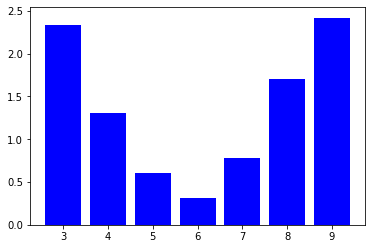

In [7]:
from sklearn import linear_model

model = linear_model.LinearRegression()

model.fit(trainSamples, trainLabels)    
modelResults = model.predict(testSamples)

print('MSE=',mean_squared_error(testLabels, modelResults))
print('R2=',r2_score(testLabels, modelResults))
errors = np.abs(modelResults-testLabels)

e = []
for i in range(3,10):
    print('class',i,' avg error=',errors[np.where(testLabels==i)].mean())
    e.append(errors[np.where(testLabels==i)].mean())
plot_labels = np.arange(3,10)
import matplotlib.pyplot as plt
plt.bar(plot_labels, e, color='blue', linewidth=3)

# Weighted results

In [8]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(trainLabels),y=trainLabels)
print("Class labels:",np.unique(labels))
print("Class weights:",class_weights)

Class labels: [3. 4. 5. 6. 7. 8. 9.]
Class weights: [ 34.98095238   4.30093677   0.48006796   0.31839459   0.79502165
   4.00545256 131.17857143]


MSE= 0.8663853355870579
myMSE= 0.8663853355870579
R2= -0.10596698925211934
class 3  avg error= 2.0561890120060298
class 4  avg error= 1.0212150028914337
class 5  avg error= 0.6585718581620342
class 6  avg error= 0.6999902537281619
class 7  avg error= 0.7176422266000657
class 8  avg error= 1.3913673311963841
class 9  avg error= 1.4774363870643583


<BarContainer object of 7 artists>

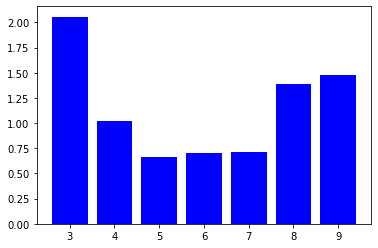

In [9]:
weights = np.ones([len(trainLabels)]) # initialize all weights to 1
for i, label in enumerate(trainLabels):
    weights[i] *= class_weights[int(label-3)] # the first label is 3!

model = linear_model.LinearRegression()
#model = linear_model.Ridge()  ## another algorithm
model.fit(trainSamples, trainLabels
         ,sample_weight=weights ## use weights!
         )    
modelResults = model.predict(testSamples)

print('MSE=',mean_squared_error(testLabels, modelResults))
print('myMSE=',np.sum((modelResults-testLabels)**2)/len(testLabels))
print('R2=',r2_score(testLabels, modelResults))
errors = np.abs(modelResults-testLabels)

e = []
for i in range(3,10):
    print('class',i,' avg error=',errors[np.where(testLabels==i)].mean())
    e.append(errors[np.where(testLabels==i)].mean())
plot_labels = np.arange(3,10)
import matplotlib.pyplot as plt
plt.bar(plot_labels, e, color='blue', linewidth=3)

## Feature selection example

In [10]:
from sklearn.feature_selection import SelectKBest
print('Samples before',samples.shape)
newSamples = SelectKBest(sklearn.feature_selection.f_regression,k=5).fit_transform(samples, labels)
print('Samples after',newSamples.shape) 
samples = newSamples


Samples before (4898, 10)
Samples after (4898, 5)
